## Regression with BIWI head pose dataset

This is a more advanced example to show how to create custom datasets and do regression with images. Our task is to find the center of the head in each image. The data comes from the [BIWI head pose dataset](https://data.vision.ee.ethz.ch/cvl/gfanelli/head_pose/head_forest.html#db), thanks to Gabriele Fanelli et al. We have converted the images to jpeg format, so you should download the converted dataset from [this link](https://s3.amazonaws.com/fast-ai-imagelocal/biwi_head_pose.tgz).

In [1]:
%matplotlib inline

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from fastai2.vision.all import *
from nbdev.showdoc import *

## Getting and converting the data

In [3]:
path = untar_data(URLs.BIWI_HEAD_POSE)

In [4]:
cal = np.genfromtxt(path/'01'/'rgb.cal', skip_footer=6); cal

array([[517.679,   0.   , 320.   ],
       [  0.   , 517.679, 240.5  ],
       [  0.   ,   0.   ,   1.   ]])

In [5]:
fname = '09/frame_00667_rgb.jpg'

In [6]:
def img2txt_name(f): return path/f'{str(f)[:-7]}pose.txt'

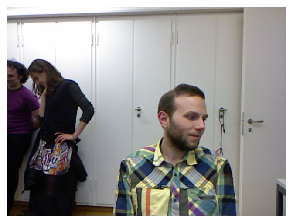

In [7]:
img = PILImage.create(path/fname)
img.show();

In [8]:
img.shape

(480, 640)

In [9]:
ctr = np.genfromtxt(img2txt_name(fname), skip_header=3); ctr

array([187.332 ,  40.3892, 893.135 ])

In [10]:
def convert_biwi(coords):
    c1 = coords[0] * cal[0][0]/coords[2] + cal[0][2]
    c2 = coords[1] * cal[1][1]/coords[2] + cal[1][2]
    return tensor([c1,c2])

def get_ctr(f):
    ctr = np.genfromtxt(img2txt_name(f), skip_header=3)
    return convert_biwi(ctr)

def get_ip(img,pts): return TensorPoint.create(pts, img_size=img.size)

In [11]:
get_ctr(fname)

tensor([428.5814, 263.9104])

In [17]:
get_ip(img, ctr)

TensorPoint([[428.5814, 263.9104]])

In [18]:
ctr

tensor([428.5814, 263.9104])

In [23]:
get_ip(img, ctr)

TensorPoint([[428.5814, 263.9104]])

In [24]:
get_ip(img, ctr)

TensorPoint([[428.5814, 263.9104]])

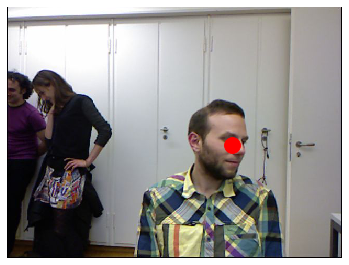

In [25]:
ax = img.show(figsize=(6, 6))
get_ip(img, ctr).show(ctx=ax, s=1000);

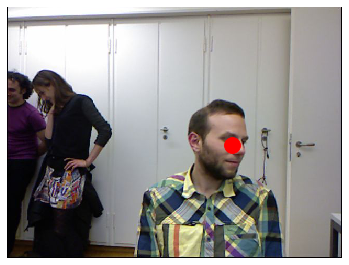

In [14]:
ctr = get_ctr(fname)
ax = img.show(figsize=(6, 6))
get_ip(img, ctr).show(ctx=ax, s=1000);

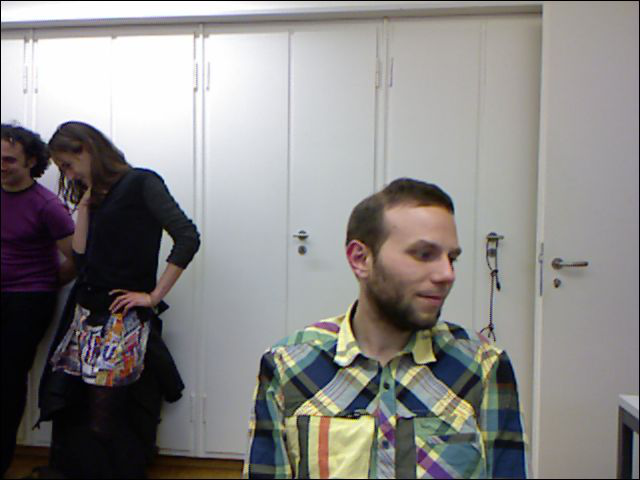

In [16]:
img

In [ ]:
get_ip(a
      )

## Creating a dataset

In [14]:
dblock = DataBlock(blocks=(ImageBlock, PointBlock),
                   get_items=get_image_files,
                   splitter=FuncSplitter(lambda o: o.parent.name=='13'),
                   get_y=get_ctr,
                   batch_tfms=[*aug_transforms(size=(120,160)), Normalize.from_stats(*imagenet_stats)])

In [15]:
dls = dblock.dataloaders(path, path=path, bs=64)

In [19]:
dls.show_batch(max_n=9, figsize=(9,6), s=1000)

NameError: name '_old_sz' is not defined

In [18]:
dls.show_batch(max_n=9, figsize=(9,6), s=1000, j=22)

NameError: name '_old_sz' is not defined

In [3]:
from matplotlib import pyplot as plt

AttributeError: 'PathCollection' object has no property 'jjj'

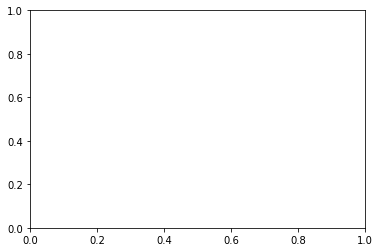

In [4]:
plt.scatter(x=[1,],y=[1,],s=2000)

In [44]:
b = dls.one_batch()

In [45]:
b[0][0]

tensor([[[ 0.5535,  0.5406,  0.5577,  ...,  0.2404,  0.1548,  0.2021],
         [ 0.5707,  0.5536,  0.5536,  ...,  0.1674,  0.1009,  0.0989],
         [ 0.5707,  0.5536,  0.5536,  ...,  0.1734,  0.1778,  0.1789],
         ...,
         [ 1.8409,  1.8009,  1.7508,  ..., -0.7178, -0.6365, -0.6663],
         [ 1.8700,  1.8045,  1.7530,  ..., -0.6143, -0.6954, -0.5117],
         [ 1.8625,  1.8039,  1.7298,  ..., -0.9114, -0.8640, -1.0129]],

        [[ 0.6078,  0.5946,  0.6121,  ...,  0.2702,  0.1826,  0.2311],
         [ 0.6254,  0.6078,  0.6078,  ...,  0.2111,  0.1137,  0.1153],
         [ 0.6254,  0.6078,  0.6078,  ...,  0.2174,  0.1912,  0.1947],
         ...,
         [ 2.0115,  1.9705,  1.9165,  ..., -0.5725, -0.4000, -0.3324],
         [ 2.0412,  1.9743,  1.9200,  ..., -0.6745, -0.7141, -0.4592],
         [ 2.0335,  1.9736,  1.8970,  ..., -0.8646, -0.7899, -0.9095]],

        [[ 0.7509,  0.7376,  0.7550,  ...,  0.2480,  0.1949,  0.2431],
         [ 0.7751,  0.7576,  0.7576,  ...,  0

In [47]:
im = b[0][0]
im.shape[-1]==1

False

In [50]:
getattr(matplotlib.image.AxesImage, 

matplotlib.image.AxesImage

In [ ]:
getattr()

In [48]:
im.shape

torch.Size([3, 120, 160])

TypeError: Invalid shape (3, 120, 160) for image data

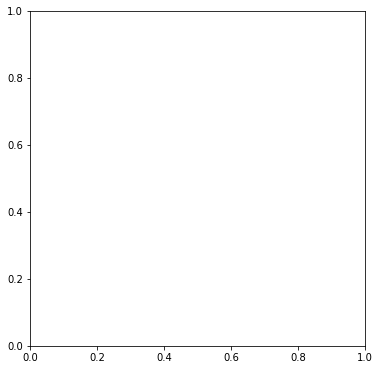

In [46]:
figsize = (6,8) 
_,ax = plt.subplots(figsize=figsize)
ax.imshow(b[0][0])

AttributeError: 'AxesImage' object has no property 's'

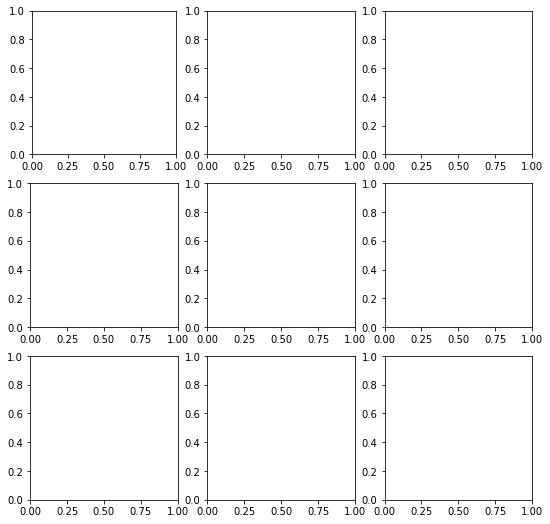

In [42]:
dls.show_batch(s=2000)

In [15]:
b = dls.one_batch()
b[1]

TensorPoint([[[-1.3720e-01,  3.8851e-01]],

        [[-1.5375e-01,  3.1560e-01]],

        [[-1.9852e-02,  1.4023e-01]],

        [[-8.0472e-02,  5.3852e-01]],

        [[ 2.6769e-02,  3.0611e-01]],

        [[-3.0689e-02,  3.4481e-01]],

        [[ 7.3714e-05,  2.9623e-01]],

        [[ 8.0316e-02,  2.1038e-01]],

        [[ 4.7732e-02,  4.3166e-01]],

        [[-3.3341e-02, -1.4573e-01]],

        [[-1.7530e-01,  3.6247e-01]],

        [[ 1.8167e-02, -4.0233e-02]],

        [[-2.3661e-03,  2.3013e-01]],

        [[ 3.3822e-01, -1.4063e-03]],

        [[ 2.7412e-01,  2.5917e-01]],

        [[-2.2784e-01,  2.3680e-01]],

        [[ 5.3957e-02,  2.1844e-01]],

        [[ 3.5612e-01,  2.6399e-01]],

        [[ 2.7617e-02,  2.9706e-01]],

        [[ 2.0709e-02,  3.2461e-02]],

        [[ 6.5426e-02,  1.1339e-01]],

        [[-1.5727e-01,  1.2226e-01]],

        [[ 2.8740e-01,  2.4349e-01]],

        [[ 3.4311e-01,  6.8592e-02]],

        [[ 2.1176e-01, -1.0235e-01]],

        [[ 3.2007e-0

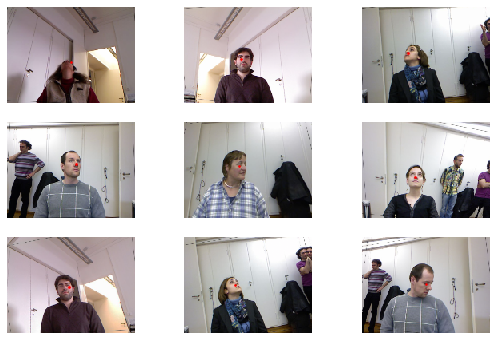

In [ ]:
dls.show_batch(max_n=9, figsize=(9,6))